In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv(r"C:\Users\Arun\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
obj_col=df.select_dtypes(include=[object]).columns.tolist()
print(obj_col)


['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [3]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [4]:
binary_cols= ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le=LabelEncoder()
for col in binary_cols:
    df[col]=le.fit_transform(df[col])

In [5]:
multi_col=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaymentMethod']
df=pd.get_dummies(df,columns=multi_col,drop_first=True)
df.drop('customerID',axis=1,inplace=True)
print(df.dtypes)


gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No inter

In [6]:
df.fillna(df.median(numeric_only=True),inplace=True)
print(df.isnull().sum())

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV

In [7]:
x=df.drop("Churn",axis=1)
y=df["Churn"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)



In [8]:
from sklearn.linear_model import LogisticRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
model=LogisticRegression(max_iter=3000)
model.fit(x_train,y_train)
logistic_pred=model.predict(x_test)
ridge_mod=Ridge(alpha=1)
ridge_mod.fit(x_train,y_train)
ridg_pred=ridge_mod.predict(x_test)
lasso_mod=Lasso(alpha=1)
lasso_mod.fit(x_train,y_train)
lasso_pred=lasso_mod.predict(x_test)
print("mean squared error is ",mean_squared_error(y_test,logistic_pred))
print("mean squared error is ",mean_squared_error(y_test,ridg_pred))
print("mean squared error is ",mean_squared_error(y_test,lasso_pred))

mean squared error is  0.18835778513961193
mean squared error is  0.1371562844948776
mean squared error is  0.15336267444834548


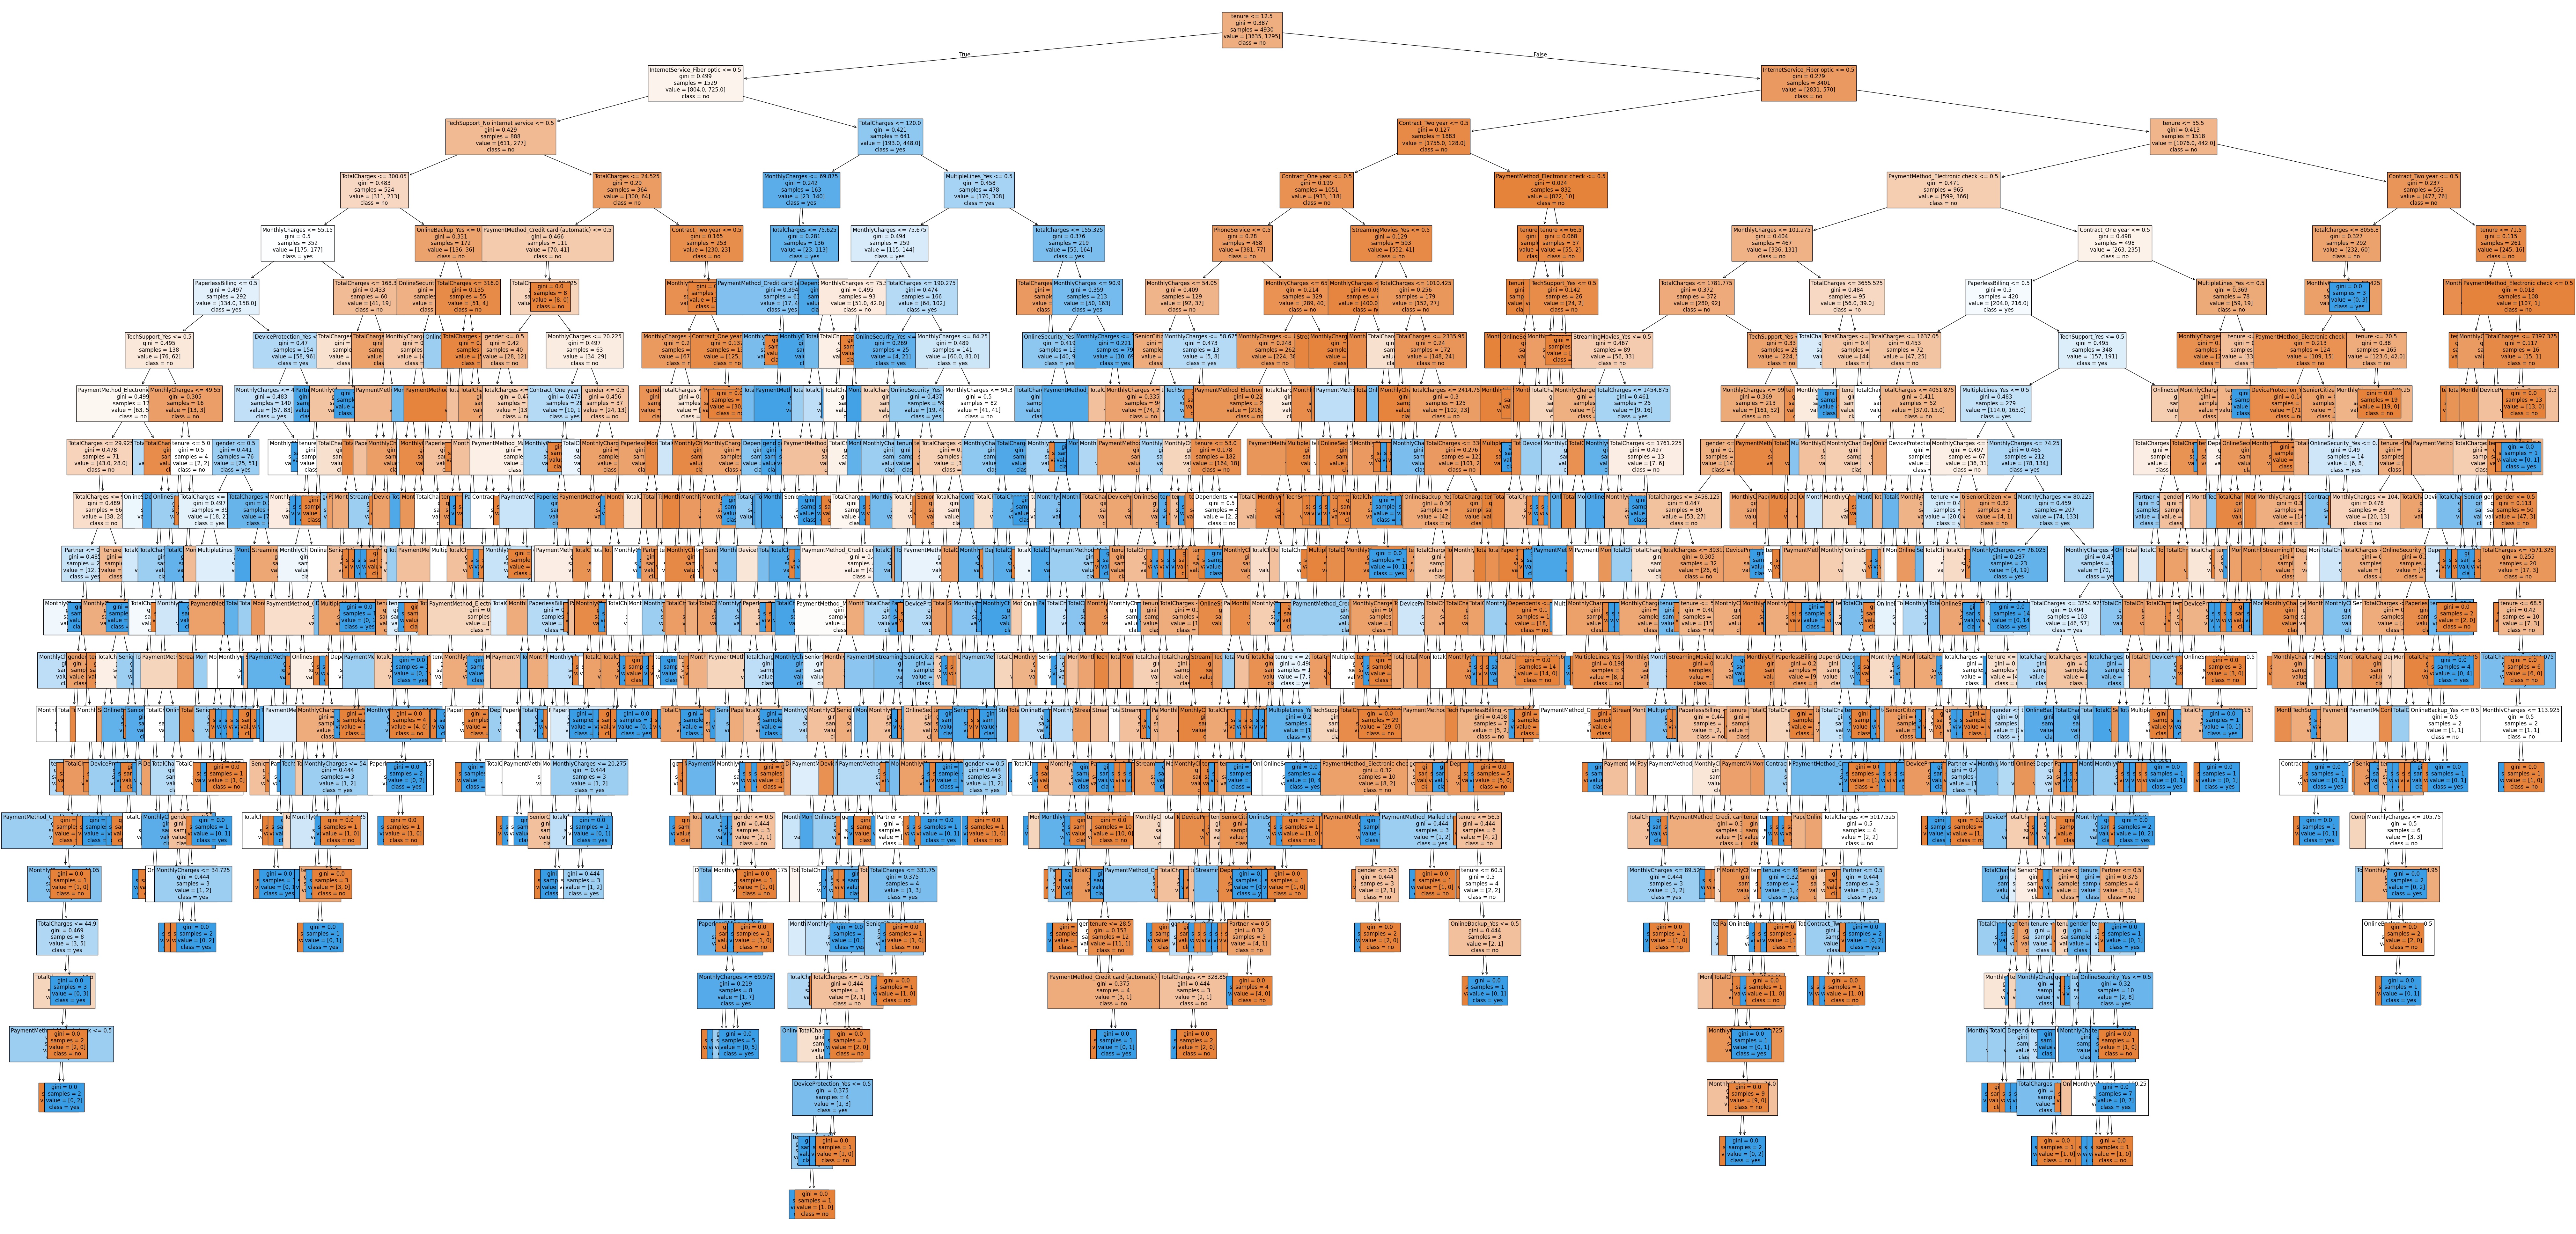

In [9]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
dec_model=DecisionTreeClassifier(random_state=42)
dec_model.fit(x_train,y_train)
dec_pred=dec_model.predict(x_test)
plt.figure(figsize=(100,50))
plot_tree(dec_model,feature_names=x.columns,class_names=["no","yes"],filled=True,fontsize=12)
plt.show()


In [10]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
random=RandomForestClassifier()
random.fit(x_train,y_train)
random_pred=random.predict(x_test)
boost=AdaBoostClassifier()
boost.fit(x_train,y_train)
boost_pred=boost.predict(x_test)

In [11]:
print("mean squared error is ",mean_squared_error(y_test,dec_pred))
print("mean squared error is ",mean_squared_error(y_test,random_pred))
print("mean squared error is ",mean_squared_error(y_test,boost_pred))

mean squared error is  0.2640795078088026
mean squared error is  0.20681495504022718
mean squared error is  0.20018930430667298
